In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

In [2]:
# Generate a random list of cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
#See the structure of the info
url = 'https://api.openweathermap.org/data/2.5/weather?'
query_url = url + 'q=' + "miami" + '&appid=' + weather_api_key
data = requests.get(query_url).json()
print (data)

{'coord': {'lon': -80.19, 'lat': 25.77}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.06, 'feels_like': 297.97, 'temp_min': 297.15, 'temp_max': 298.71, 'pressure': 1016, 'humidity': 83}, 'visibility': 16093, 'wind': {'speed': 6.7, 'deg': 60}, 'rain': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1589516971, 'sys': {'type': 1, 'id': 4896, 'country': 'US', 'sunrise': 1589538895, 'sunset': 1589587171}, 'timezone': -14400, 'id': 4164138, 'name': 'Miami', 'cod': 200}


In [53]:
final_cities_list = []
country = []
date = []
lat = []
lng = []
humidity = []
cloudiness = []
max_temp = []
wind_speed = []

url = 'https://api.openweathermap.org/data/2.5/weather?'
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")
for i in cities:
    query_url = url + 'q=' + i + '&appid=' + weather_api_key
    data = requests.get(query_url).json()
    if(data['cod'] == 200):
        print("Processing data of " + str(i))
        final_cities_list.append(i)   
        country.append(data['sys']['country'])
        date.append(data['dt'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        max_temp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
    else:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retreival complete")
print(f"Final list have {len(final_cities_list)} cities.")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing data of lima
Processing data of fortuna
Processing data of kapaa
Processing data of jamestown
City not found. Skipping...
Processing data of butaritari
Processing data of mataura
Processing data of carnarvon
Processing data of ushuaia
Processing data of punta arenas
Processing data of hilo
Processing data of tuktoyaktuk
Processing data of longyearbyen
Processing data of east london
City not found. Skipping...
Processing data of khatanga
Processing data of paris
Processing data of saint-joseph
Processing data of sobolevo
Processing data of margate
Processing data of alice springs
Processing data of yangambi
Processing data of jurm
Processing data of purranque
Processing data of albany
Processing data of upernavik
Processing data of zhigansk
Processing data of talnakh
Processing data of cherskiy
Processing data of sorland
City not found. Skipping...
Processing data of atuona
Processing data of

Processing data of suba
Processing data of mangrol
Processing data of najran
Processing data of huilong
City not found. Skipping...
Processing data of kysyl-syr
Processing data of sitka
Processing data of victoria
Processing data of hambantota
Processing data of jungapeo
Processing data of guican
Processing data of tommot
Processing data of new london
Processing data of caxias
Processing data of lucea
Processing data of ust-kut
Processing data of turkistan
Processing data of saint anthony
City not found. Skipping...
Processing data of great malvern
Processing data of jalu
Processing data of batemans bay
Processing data of hobyo
Processing data of tumut
Processing data of kisangani
Processing data of chilliwack
Processing data of kidal
Processing data of rocha
Processing data of georgetown
Processing data of raahe
Processing data of kabale
Processing data of pevek
Processing data of anadyr
Processing data of namatanai
Processing data of mwinilunga
Processing data of sabang
City not foun

Processing data of taksimo
City not found. Skipping...
Processing data of baie-comeau
Processing data of mandurah
Processing data of berlevag
Processing data of springbok
Processing data of bhatkal
Processing data of benguela
Processing data of beloha
Processing data of leshukonskoye
Processing data of burnie
Processing data of portmore
Processing data of valparaiso
Processing data of hay river
Processing data of yima
Processing data of quelimane
City not found. Skipping...
Processing data of lavrentiya
Processing data of adrar
City not found. Skipping...
Processing data of kuznetsk
Processing data of le port
Processing data of dire
Processing data of sherlovaya gora
Processing data of marsa matruh
Processing data of ati
Processing data of campo de criptana
Processing data of zima
Processing data of juneau
Processing data of lashio
Processing data of rasulabad
Processing data of ola
Processing data of nantucket
Processing data of palia kalan
Processing data of tokur
Processing data of 

In [54]:
cities_dict = {}
cities_dict = list(zip(final_cities_list,country,
                       date,lat,lng,
                       humidity,cloudiness,max_temp,wind_speed))
df = pd.DataFrame(cities_dict,columns=['City','Country',
                                       'Date','Lat','Lng',
                                       'Humidity','Cloudiness','Max Temp','Wind Speed'])
#df.head()

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Max Temp,Wind Speed
0,lima,PE,1589522207,-12.04,-77.03,88,90,291.15,3.60
1,fortuna,US,1589522797,40.60,-124.16,93,1,284.26,0.99
2,kapaa,US,1589522797,22.08,-159.32,78,1,297.15,2.10
3,jamestown,US,1589522572,42.10,-79.24,100,90,288.15,4.60
4,butaritari,KI,1589522800,3.07,172.79,70,9,301.74,2.30


In [55]:
# Date is in Unix Timestamp, so it have to be converted into DateTime
#df['DateTime_ms'] = pd.to_datetime(df['Date'],unit ='ms')
#df['DateTime_ns'] = pd.to_datetime(df['Date'],unit ='ns')
df['Date'] = pd.to_datetime(df['Date'],unit ='s')
#df['Date'] =  pd.to_datetime(df['Date']).dt.date
df['Date'] =  df['Date'].dt.date
#df.head()
df.to_csv('output/weather_data.csv')

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Max Temp,Wind Speed
0,lima,PE,2020-05-15,-12.04,-77.03,88,90,291.15,3.60
1,fortuna,US,2020-05-15,40.60,-124.16,93,1,284.26,0.99
2,kapaa,US,2020-05-15,22.08,-159.32,78,1,297.15,2.10
3,jamestown,US,2020-05-15,42.10,-79.24,100,90,288.15,4.60
4,butaritari,KI,2020-05-15,3.07,172.79,70,9,301.74,2.30


## Latitude vs Temperature 

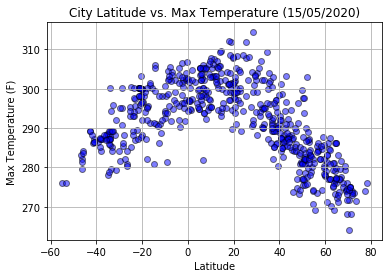

In [76]:
plt.scatter(lat,max_temp, 
            color='b', edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%d/%m/%Y"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Lat-MaxTemp.png")
plt.show()

## Latitude vs Humidity

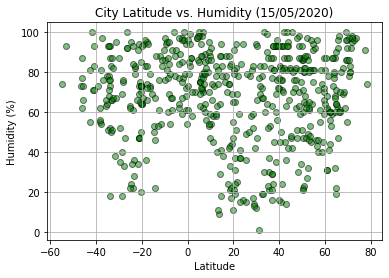

In [75]:
plt.scatter(lat, humidity,
            color='g', edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%d/%m/%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Lat-Hum.png")
plt.show()

## Latitude vs. Cloudiness

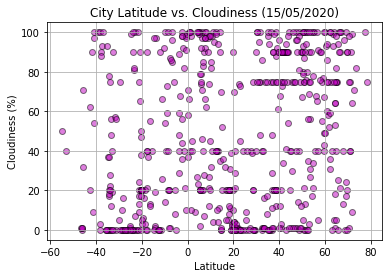

In [78]:
plt.scatter(lat, cloudiness,
            color='m', edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%d/%m/%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Lat-Cloud.png")
plt.show()

## Latitude vs. Wind Speed

In [ ]:
plt.scatter(lat, wind_speed,
            color='y', edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%d/%m/%Y"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output/Lat-Wind.png")
plt.show()